In [44]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1
...,...,...,...
995,6.208962,5.233968,1
996,-9.795754,3.502709,0
997,4.335167,5.928298,1
998,-8.466632,3.577022,0


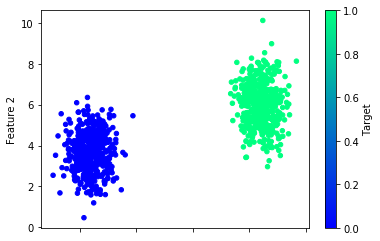

In [45]:
X ,y=make_blobs(n_samples=1000,centers=2 ,n_features=2,random_state=78)

#Creating a DataFrame with the dummy data
df=pd.DataFrame(X,columns=["Feature 1","Feature 2"])
df["Target"]=y
#plotting the dummy data
df.plot.scatter(x="Feature 1",y="Feature 2",c="Target",colormap="winter")
df

In [46]:
#Use sklearn to splite dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=78)

In [47]:
#Create scaler instance
X_scaler=skl.preprocessing.StandardScaler()
X_scaler.fit(X_train)

X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [48]:
#Create the Keras Sequential model
nn_model=tf.keras.models.Sequential()

In [49]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [50]:
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [51]:
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [52]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [53]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.7166 - accuracy: 0.0000e+00
Epoch 2/100
750/750 [==============================] - 0s 84us/sample - loss: 0.7087 - accuracy: 0.0000e+00
Epoch 3/100
750/750 [==============================] - 0s 87us/sample - loss: 0.7018 - accuracy: 0.0000e+00
Epoch 4/100
750/750 [==============================] - 0s 73us/sample - loss: 0.6958 - accuracy: 0.2827
Epoch 5/100
750/750 [==============================] - 0s 77us/sample - loss: 0.6903 - accuracy: 0.5067
Epoch 6/100
750/750 [==============================] - 0s 76us/sample - loss: 0.6847 - accuracy: 0.5067
Epoch 7/100
750/750 [==============================] - 0s 84us/sample - loss: 0.6786 - accuracy: 0.5067
Epoch 8/100
750/750 [==============================] - 0s 85us/sample - loss: 0.6712 - accuracy: 0.5067
Epoch 9/100
750/750 [==============================] - 0s 80us/sample - loss: 0.6623 - accuracy: 0.5067
Epoch 10/100
750/750 [==========

750/750 [==============================] - 0s 72us/sample - loss: 0.1149 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 67us/sample - loss: 0.1129 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 69us/sample - loss: 0.1109 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 69us/sample - loss: 0.1090 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 66us/sample - loss: 0.1071 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 70us/sample - loss: 0.1053 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 69us/sample - loss: 0.1035 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 78us/sample - loss: 0.1018 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 76us/sample - loss: 0.1000 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 79us/samp

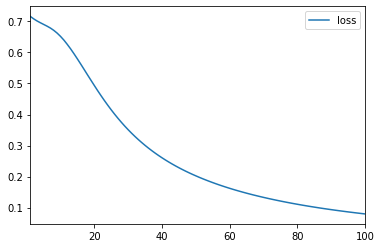

In [54]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

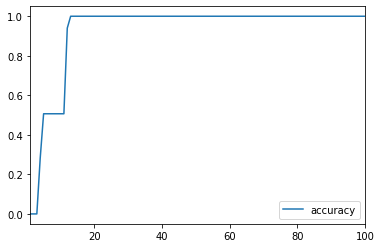

In [55]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [56]:
model_loss,model_accuracy=nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss:{model_loss},Accuracy:{model_accuracy}")

250/1 - 0s - loss: 0.0703 - accuracy: 1.0000
Loss:0.08115509280562401,Accuracy:1.0


In [57]:
new_X,new_Y=make_blobs(n_samples=10,centers=2,n_features=2,random_state=78)
nn_model.predict_classes(new_X)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

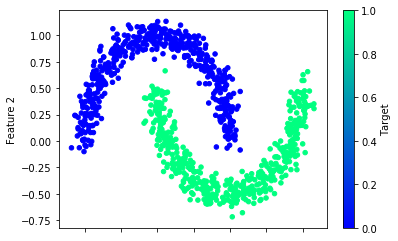

In [58]:
from sklearn.datasets import make_moons
X_moons,y_moons=make_moons(n_samples=1000,noise=0.08,random_state=78)
y_moons=y_moons.reshape(-1,1)
#Creating a daraFrame to plot the non linear dummy data
df_moons=pd.DataFrame(X_moons,columns=["Feature 1", "Feature 2"])
df_moons["Target"]=y_moons

#plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2",c="Target", colormap="winter")

In [59]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [60]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 122us/sample - loss: 1.0473 - accuracy: 0.4827
Epoch 2/100
750/750 [==============================] - 0s 74us/sample - loss: 0.9579 - accuracy: 0.4960
Epoch 3/100
750/750 [==============================] - 0s 67us/sample - loss: 0.8966 - accuracy: 0.5093
Epoch 4/100
750/750 [==============================] - 0s 68us/sample - loss: 0.8502 - accuracy: 0.5147
Epoch 5/100
750/750 [==============================] - 0s 67us/sample - loss: 0.8158 - accuracy: 0.5267
Epoch 6/100
750/750 [==============================] - 0s 69us/sample - loss: 0.7886 - accuracy: 0.5347
Epoch 7/100
750/750 [==============================] - 0s 74us/sample - loss: 0.7654 - accuracy: 0.5387
Epoch 8/100
750/750 [==============================] - 0s 74us/sample - loss: 0.7460 - accuracy: 0.5480
Epoch 9/100
750/750 [==============================] - 0s 79us/sample - loss: 0.7292 - accuracy: 0.5520
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 78us/sample - loss: 0.3521 - accuracy: 0.8227
Epoch 79/100
750/750 [==============================] - 0s 73us/sample - loss: 0.3493 - accuracy: 0.8227
Epoch 80/100
750/750 [==============================] - 0s 81us/sample - loss: 0.3465 - accuracy: 0.8227
Epoch 81/100
750/750 [==============================] - 0s 86us/sample - loss: 0.3439 - accuracy: 0.8227
Epoch 82/100
750/750 [==============================] - 0s 85us/sample - loss: 0.3412 - accuracy: 0.8240
Epoch 83/100
750/750 [==============================] - 0s 82us/sample - loss: 0.3385 - accuracy: 0.8280
Epoch 84/100
750/750 [==============================] - 0s 84us/sample - loss: 0.3361 - accuracy: 0.8280
Epoch 85/100
750/750 [==============================] - 0s 83us/sample - loss: 0.3336 - accuracy: 0.8280
Epoch 86/100
750/750 [==============================] - 0s 74us/sample - loss: 0.3312 - accuracy: 0.8293
Epoch 87/100
750/750 [==============================] - 0s 71us/samp

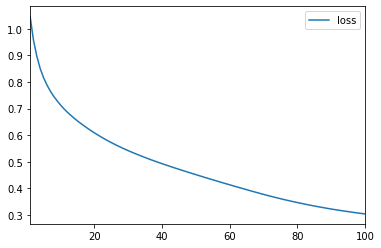

In [61]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

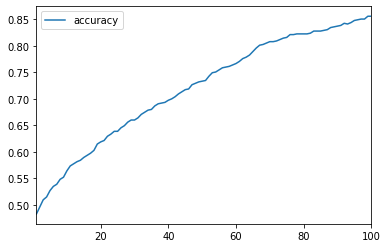

In [62]:
# Plot the loss
history_df.plot(y="accuracy")

In [63]:
# Generate our new Sequential model
new_model=tf.keras.models.Sequential()

In [64]:
# add the input and hidden layer
number_inputs=2
number_hidden_nodes=6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes,activation="relu",input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [65]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.6861 - accuracy: 0.4267
Epoch 2/100
750/750 [==============================] - 0s 83us/sample - loss: 0.6414 - accuracy: 0.5893
Epoch 3/100
750/750 [==============================] - 0s 94us/sample - loss: 0.6005 - accuracy: 0.8360
Epoch 4/100
750/750 [==============================] - 0s 90us/sample - loss: 0.5631 - accuracy: 0.8453
Epoch 5/100
750/750 [==============================] - 0s 79us/sample - loss: 0.5292 - accuracy: 0.8507
Epoch 6/100
750/750 [==============================] - 0s 82us/sample - loss: 0.4996 - accuracy: 0.8507
Epoch 7/100
750/750 [==============================] - 0s 82us/sample - loss: 0.4724 - accuracy: 0.8507
Epoch 8/100
750/750 [==============================] - 0s 78us/sample - loss: 0.4482 - accuracy: 0.8507
Epoch 9/100
750/750 [==============================] - 0s 79us/sample - loss: 0.4261 - accuracy: 0.8520
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 86us/sample - loss: 0.2457 - accuracy: 0.8933
Epoch 79/100
750/750 [==============================] - 0s 81us/sample - loss: 0.2456 - accuracy: 0.8933
Epoch 80/100
750/750 [==============================] - 0s 85us/sample - loss: 0.2452 - accuracy: 0.8947
Epoch 81/100
750/750 [==============================] - 0s 74us/sample - loss: 0.2450 - accuracy: 0.8947
Epoch 82/100
750/750 [==============================] - 0s 69us/sample - loss: 0.2448 - accuracy: 0.8947
Epoch 83/100
750/750 [==============================] - 0s 72us/sample - loss: 0.2446 - accuracy: 0.8947
Epoch 84/100
750/750 [==============================] - 0s 78us/sample - loss: 0.2444 - accuracy: 0.8947
Epoch 85/100
750/750 [==============================] - 0s 80us/sample - loss: 0.2441 - accuracy: 0.8947
Epoch 86/100
750/750 [==============================] - 0s 77us/sample - loss: 0.2439 - accuracy: 0.8947
Epoch 87/100
750/750 [==============================] - 0s 78us/samp

In [66]:
import pandas as pd
import sklearn as skl
ramen_df=pd.read_csv("ramen-ratings.csv")
country_counts=ramen_df.Country.value_counts()
country_counts
                     

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Holland            4
Fiji               4
Poland             4
Sarawak            3
Finland            3
Sweden             3
Dubai              3
Estonia            2
Ghana              2
United States      1
Nigeria            1
Name: Country, dtype: int64

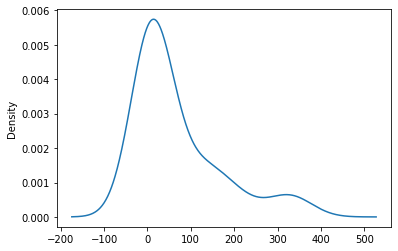

In [67]:
# Visualize the value counts
country_counts.plot.density()

In [68]:
replace_countries=list(country_counts[country_counts<100].index)
for country in replace_countries:
    ramen_df.Country=ramen_df.Country.replace(country,"Other")
    
ramen_df.Country.value_counts()


Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [69]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
encode_df=pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

encode_df.columns=enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

hr_df=pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [72]:
#create the standardscaler instance
scaler=StandardScaler()

In [73]:
scaler.fit(hr_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
scaled_data=scaler.transform(hr_df)

In [75]:
transformed_scaled_data=pd.DataFrame(scaled_data,columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

attrition_df=pd.read_csv("HR-Employee-Attrition.csv")
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [77]:
attrition_cat=attrition_df.dtypes[attrition_df.dtypes=="object"].index.tolist()

In [78]:
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [79]:
enc=OneHotEncoder(sparse=False)
encode_df=pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

encode_df.columns=enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [80]:
attrition_df=attrition_df.merge(encode_df,left_index=True,right_index=True)
attrition_df=attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [81]:
#spilt our preprocessed data into our features and target arrays
y=attrition_df["Attrition_Yes"].values
X=attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=78)

In [82]:
scaler=StandardScaler()
X_scaler=scaler.fit(X_train)

X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [88]:
number_input_features=len(X_train[0])
hidden_nodes_layer1=8
hidden_nodes_layer2=5

nn=tf.keras.models.Sequential()
#First Layers
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features,activation="relu"))
#Second Layers
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="relu"))
#Output Layer
nn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 8)                 448       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [84]:
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [85]:
fit_model=nn.fit(X_train,y_train,epochs=100)

Train on 1102 samples
Epoch 1/100
1102/1102 [==============================] - 1s 1ms/sample - loss: 317.1015 - accuracy: 0.8276
Epoch 2/100
1102/1102 [==============================] - 0s 87us/sample - loss: 77.9481 - accuracy: 0.7559
Epoch 3/100
1102/1102 [==============================] - 0s 85us/sample - loss: 17.6755 - accuracy: 0.7350
Epoch 4/100
1102/1102 [==============================] - 0s 89us/sample - loss: 12.7346 - accuracy: 0.7232
Epoch 5/100
1102/1102 [==============================] - 0s 79us/sample - loss: 9.7574 - accuracy: 0.7305
Epoch 6/100
1102/1102 [==============================] - 0s 82us/sample - loss: 7.2971 - accuracy: 0.7323
Epoch 7/100
1102/1102 [==============================] - 0s 86us/sample - loss: 5.2190 - accuracy: 0.7123
Epoch 8/100
1102/1102 [==============================] - 0s 86us/sample - loss: 4.4961 - accuracy: 0.7323
Epoch 9/100
1102/1102 [==============================] - 0s 83us/sample - loss: 5.1620 - accuracy: 0.7368
Epoch 10/100
1102/11

1102/1102 [==============================] - 0s 89us/sample - loss: 1.0351 - accuracy: 0.8004
Epoch 78/100
1102/1102 [==============================] - 0s 77us/sample - loss: 1.4646 - accuracy: 0.7650
Epoch 79/100
1102/1102 [==============================] - 0s 74us/sample - loss: 1.2237 - accuracy: 0.7868
Epoch 80/100
1102/1102 [==============================] - 0s 76us/sample - loss: 2.0547 - accuracy: 0.7477
Epoch 81/100
1102/1102 [==============================] - 0s 89us/sample - loss: 1.2830 - accuracy: 0.7759
Epoch 82/100
1102/1102 [==============================] - 0s 90us/sample - loss: 1.0010 - accuracy: 0.7813
Epoch 83/100
1102/1102 [==============================] - 0s 82us/sample - loss: 0.7933 - accuracy: 0.7931
Epoch 84/100
1102/1102 [==============================] - 0s 74us/sample - loss: 0.8933 - accuracy: 0.7913
Epoch 85/100
1102/1102 [==============================] - 0s 74us/sample - loss: 0.9779 - accuracy: 0.7813
Epoch 86/100
1102/1102 [==========================

In [86]:
model_loss,model_accuracy=nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss:{model_loss},Accuracy:{model_accuracy}")

368/1 - 0s - loss: 1.1938 - accuracy: 0.5543
Loss:1.8364334547001382,Accuracy:0.554347813129425


In [89]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [90]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 1102 samples
Epoch 1/100
 768/1102 [===================>..........] - ETA: 0s - loss: 0.6618 - accuracy: 0.6901 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
1102/1102 [==============================] - 1s 838us/sample - loss: 0.6570 - accuracy: 0.7024
Epoch 2/100
 736/1102 [===================>..........] - ETA: 0s - loss: 0.6013 - accuracy: 0.8261
Epoch 00002: saving model to checkpoints/weights.02.hdf5
1102/1102 [==============================] - 0s 90us/sample - loss: 0.5974 - accuracy: 0.8194
Epoch 3/100
 736/1102 [===================>..........] - ETA: 0s - loss: 0.5582 - accuracy: 0.8125
Epoch 00003: saving model to checkpoints/weights.03.hdf5
1102/1102 [==============================] - 0s 87us/sample - loss: 0.5471 - accuracy: 0.8285
Epoch 4/100
  32/1102 [..............................] - ETA: 0s - loss: 0.4646 - accuracy: 0.9062
Epoch 00004: saving model to checkpoints/weights.04.hdf5
1102/1102 [==============================] - 0s 86us/sample - loss: 0.

 480/1102 [============>.................] - ETA: 0s - loss: 0.2515 - accuracy: 0.9125
Epoch 00032: saving model to checkpoints/weights.32.hdf5
1102/1102 [==============================] - 0s 104us/sample - loss: 0.2569 - accuracy: 0.9038
Epoch 33/100
 704/1102 [==================>...........] - ETA: 0s - loss: 0.2550 - accuracy: 0.9006
Epoch 00033: saving model to checkpoints/weights.33.hdf5
1102/1102 [==============================] - 0s 86us/sample - loss: 0.2555 - accuracy: 0.9038
Epoch 34/100
 704/1102 [==================>...........] - ETA: 0s - loss: 0.2473 - accuracy: 0.9034
Epoch 00034: saving model to checkpoints/weights.34.hdf5
1102/1102 [==============================] - 0s 90us/sample - loss: 0.2527 - accuracy: 0.9020
Epoch 35/100
 608/1102 [===============>..............] - ETA: 0s - loss: 0.2813 - accuracy: 0.8914
Epoch 00035: saving model to checkpoints/weights.35.hdf5
1102/1102 [==============================] - 0s 101us/sample - loss: 0.2516 - accuracy: 0.9038
Epoch 3

1102/1102 [==============================] - 0s 96us/sample - loss: 0.2172 - accuracy: 0.9156
Epoch 64/100
  32/1102 [..............................] - ETA: 0s - loss: 0.2393 - accuracy: 0.9062
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 544/1102 [=============>................] - ETA: 0s - loss: 0.1911 - accuracy: 0.9357
Epoch 00064: saving model to checkpoints/weights.64.hdf5
1102/1102 [==============================] - 0s 95us/sample - loss: 0.2161 - accuracy: 0.9174
Epoch 65/100
 736/1102 [===================>..........] - ETA: 0s - loss: 0.2148 - accuracy: 0.9239
Epoch 00065: saving model to checkpoints/weights.65.hdf5
1102/1102 [==============================] - 0s 89us/sample - loss: 0.2157 - accuracy: 0.9174
Epoch 66/100
 608/1102 [===============>..............] - ETA: 0s - loss: 0.2148 - accuracy: 0.9178
Epoch 00066: saving model to checkpoints/weights.66.hdf5
1102/1102 [==============================] - 0s 97us/sample - loss: 0.2137 - accuracy: 0.9211
Epoch 67/

1102/1102 [==============================] - 0s 83us/sample - loss: 0.1908 - accuracy: 0.9283
Epoch 95/100
  32/1102 [..............................] - ETA: 0s - loss: 0.3093 - accuracy: 0.8750
Epoch 00095: saving model to checkpoints/weights.95.hdf5
1102/1102 [==============================] - 0s 91us/sample - loss: 0.1904 - accuracy: 0.9310
Epoch 96/100
  32/1102 [..............................] - ETA: 0s - loss: 0.3793 - accuracy: 0.8125
Epoch 00096: saving model to checkpoints/weights.96.hdf5
 576/1102 [==============>...............] - ETA: 0s - loss: 0.1836 - accuracy: 0.9375
Epoch 00096: saving model to checkpoints/weights.96.hdf5
1102/1102 [==============================] - 0s 95us/sample - loss: 0.1899 - accuracy: 0.9301
Epoch 97/100
 704/1102 [==================>...........] - ETA: 0s - loss: 0.1977 - accuracy: 0.9233
Epoch 00097: saving model to checkpoints/weights.97.hdf5
1102/1102 [==============================] - 0s 85us/sample - loss: 0.1889 - accuracy: 0.9319
Epoch 98/

In [94]:
number_input_features=len(X_train[0])
hidden_nodes_layer1=8
hidden_nodes_layer2=5

nn_new=tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


#compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

#Evaluate teh model using the test data
model_loss,model_accuracy=nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss:{model_loss}, Accuracy:{model_accuracy}")







368/1 - 0s - loss: 0.2232 - accuracy: 0.8832
Loss:0.36401979268892953, Accuracy:0.883152186870575


In [95]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [96]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [97]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

368/1 - 0s - loss: 0.2232 - accuracy: 0.8832
Loss: 0.36401979268892953, Accuracy: 0.883152186870575
